In [1]:
import ROOT as rt

Welcome to JupyROOT 6.12/06


In [2]:
tree = rt.TChain("rechitntupler/hits", "Hits"); 
tree2 = rt.TChain("trackimpactntupler/impactPoints", "Tracks");

tree.AddFriend(tree2, "tracks");

In [3]:
#pattern = "scan1/ntuple_1*" ## Scan#3 from 1372 to 1440
#pattern = "scan2/ntuple_1*" ## Scan#2 1464 to 1537
#pattern = "scan3/ntuple_1*" ## Scan#2 1272 to 1339
pattern = "calo_scan/ntuple_1*" ## Scan after calo setup

tree.Add(pattern);
tree2.Add(pattern);

In [4]:
#rt.TProof.Open('workers=4').SetLogLevel(0)
#tree.SetProof()

In [5]:
%%time
tree.GetEntries()

CPU times: user 339 ms, sys: 81.2 ms, total: 420 ms
Wall time: 594 ms


596901L

In [6]:
tree.SetMarkerStyle(7)

In [7]:
tree.SetAlias("rechit_HG","rechit_energyHigh");
tree.SetAlias("rechit_LG","rechit_energyLow");

tree.SetAlias("rechit_id","rechit_channel + 64*rechit_skiroc");

## Invert rechit positions except for Chips 1 and 3
tree.SetAlias("rechit_corry","-rechit_y * (-1+2*(rechit_skiroc%2 == 0))");
tree.SetAlias("rechit_corrx","-rechit_x * (-1+2*(rechit_skiroc%2 == 0))");

tree.SetAlias("deltaX_tele","rechit_corrx + impactX_HGCal_layer_1");
tree.SetAlias("deltaY_tele","rechit_corry + impactY_HGCal_layer_1");

## Align impact position to board
tree.SetAlias("impactY","(PI_positionY-140 - impactY_HGCal_layer_1)/10. - 0.338");
tree.SetAlias("impactX","(PI_positionX-85  - impactX_HGCal_layer_1)/10. - 0.15");

tree.SetAlias("deltaX","rechit_corrx - impactX");
tree.SetAlias("deltaY","rechit_corry - impactY");
#tree.SetAlias("deltaX","- rechit_x - impactX");
#tree.SetAlias("deltaY","- rechit_y - impactY");


tree.SetAlias("deltaR","sqrt(deltaX*deltaX + deltaY * deltaY)");

tree.SetAlias("rechit_gainHLG","abs(rechit_energyHigh/rechit_energyLow - 10)");

In [8]:
cutstr = "PI_positionY > 0 ";
cutstr += "&& ntracks == 1 ";
#cutstr += "&& event < 100 ";
cutstr += "&& rechit_layer == 1 && rechit_energy > 0.5 && rechit_energy < 5 && rechit_gainHLG < 5"

# noisy channels
cutstr += "& !(rechit_skiroc == 0 && rechit_channel == 44)"

In [9]:
canv = rt.TCanvas("canv","c",1000,600);

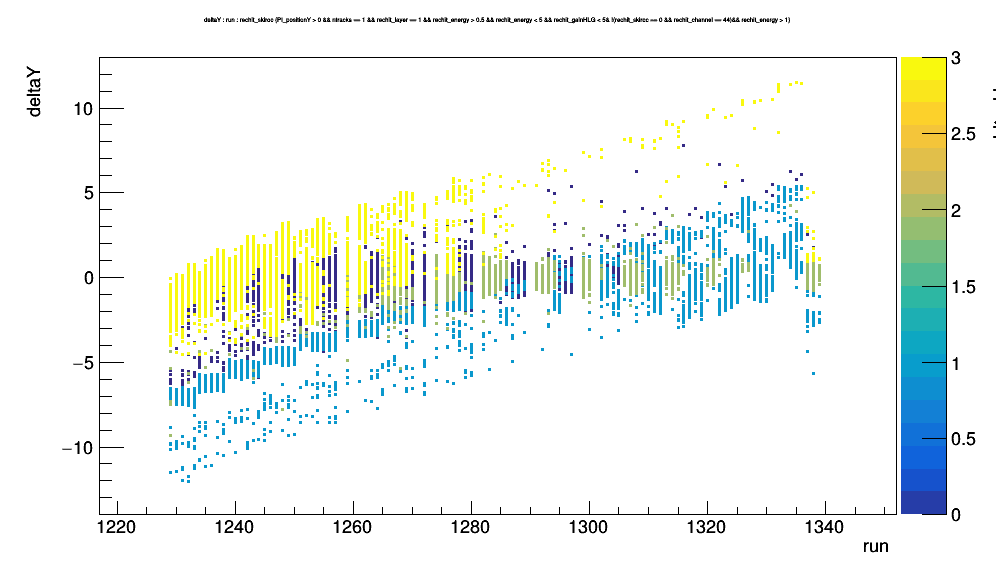

In [10]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaY : run : rechit_skiroc",cuts,"pcolz");
canv.Draw()

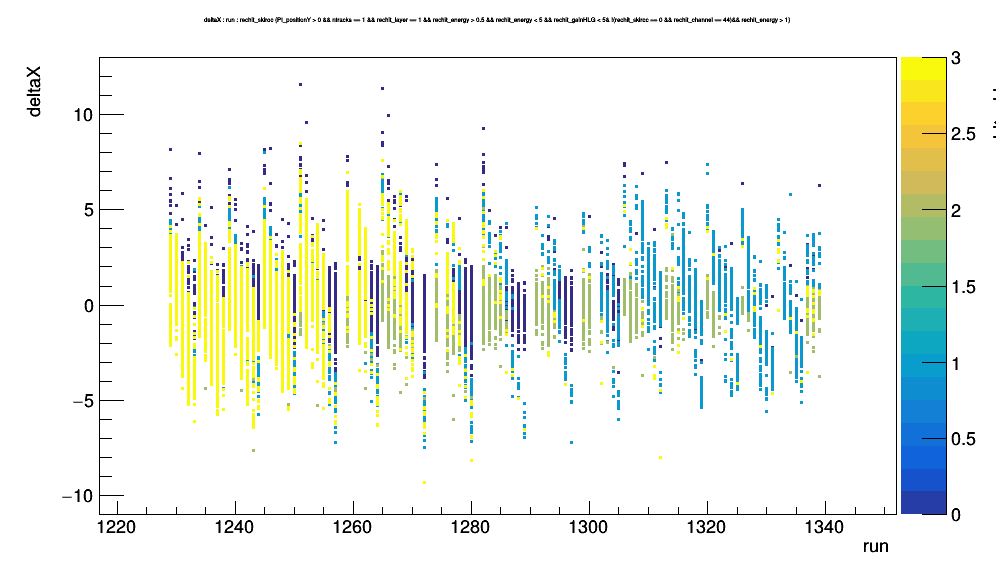

In [11]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaX : run : rechit_skiroc",cuts,"pcolz");
canv.Draw()

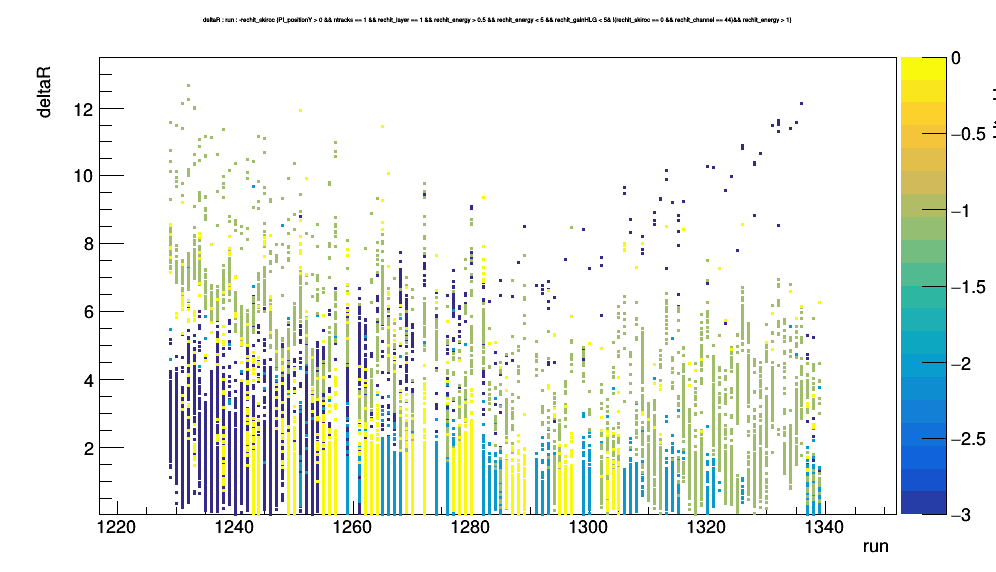

In [13]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaR : run : rechit_skiroc",cuts,"pcolz");
canv.Draw()

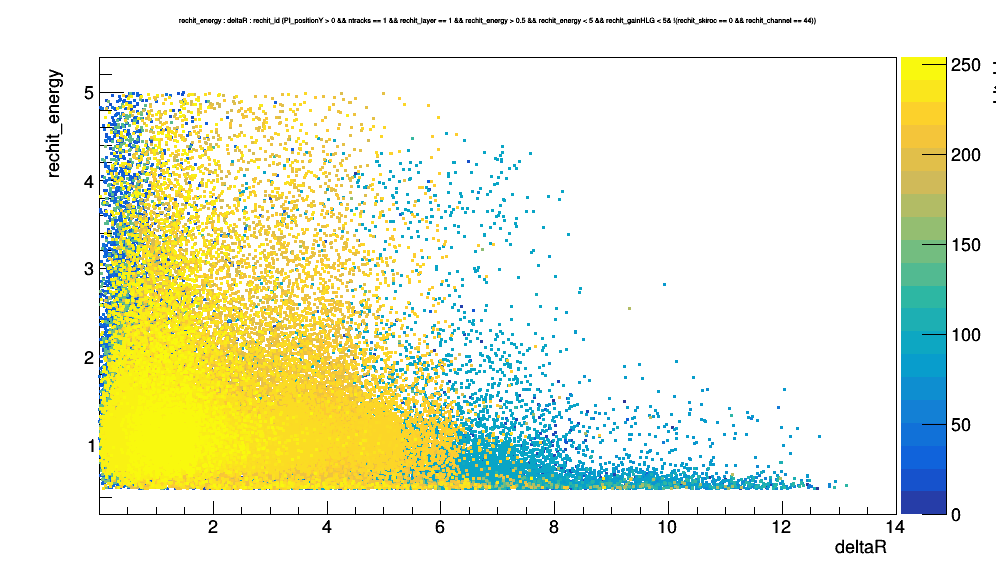

In [8]:
tree.Draw("rechit_energy : deltaR : rechit_id",cutstr,"pcolz");
canv.Draw()

In [9]:
canv_split = rt.TCanvas("canv_split","c",2000,1200);
canv_split.Divide(2,2);

In [10]:
canv_split.SetCanvasSize(2000,1200)

0
1
2
3


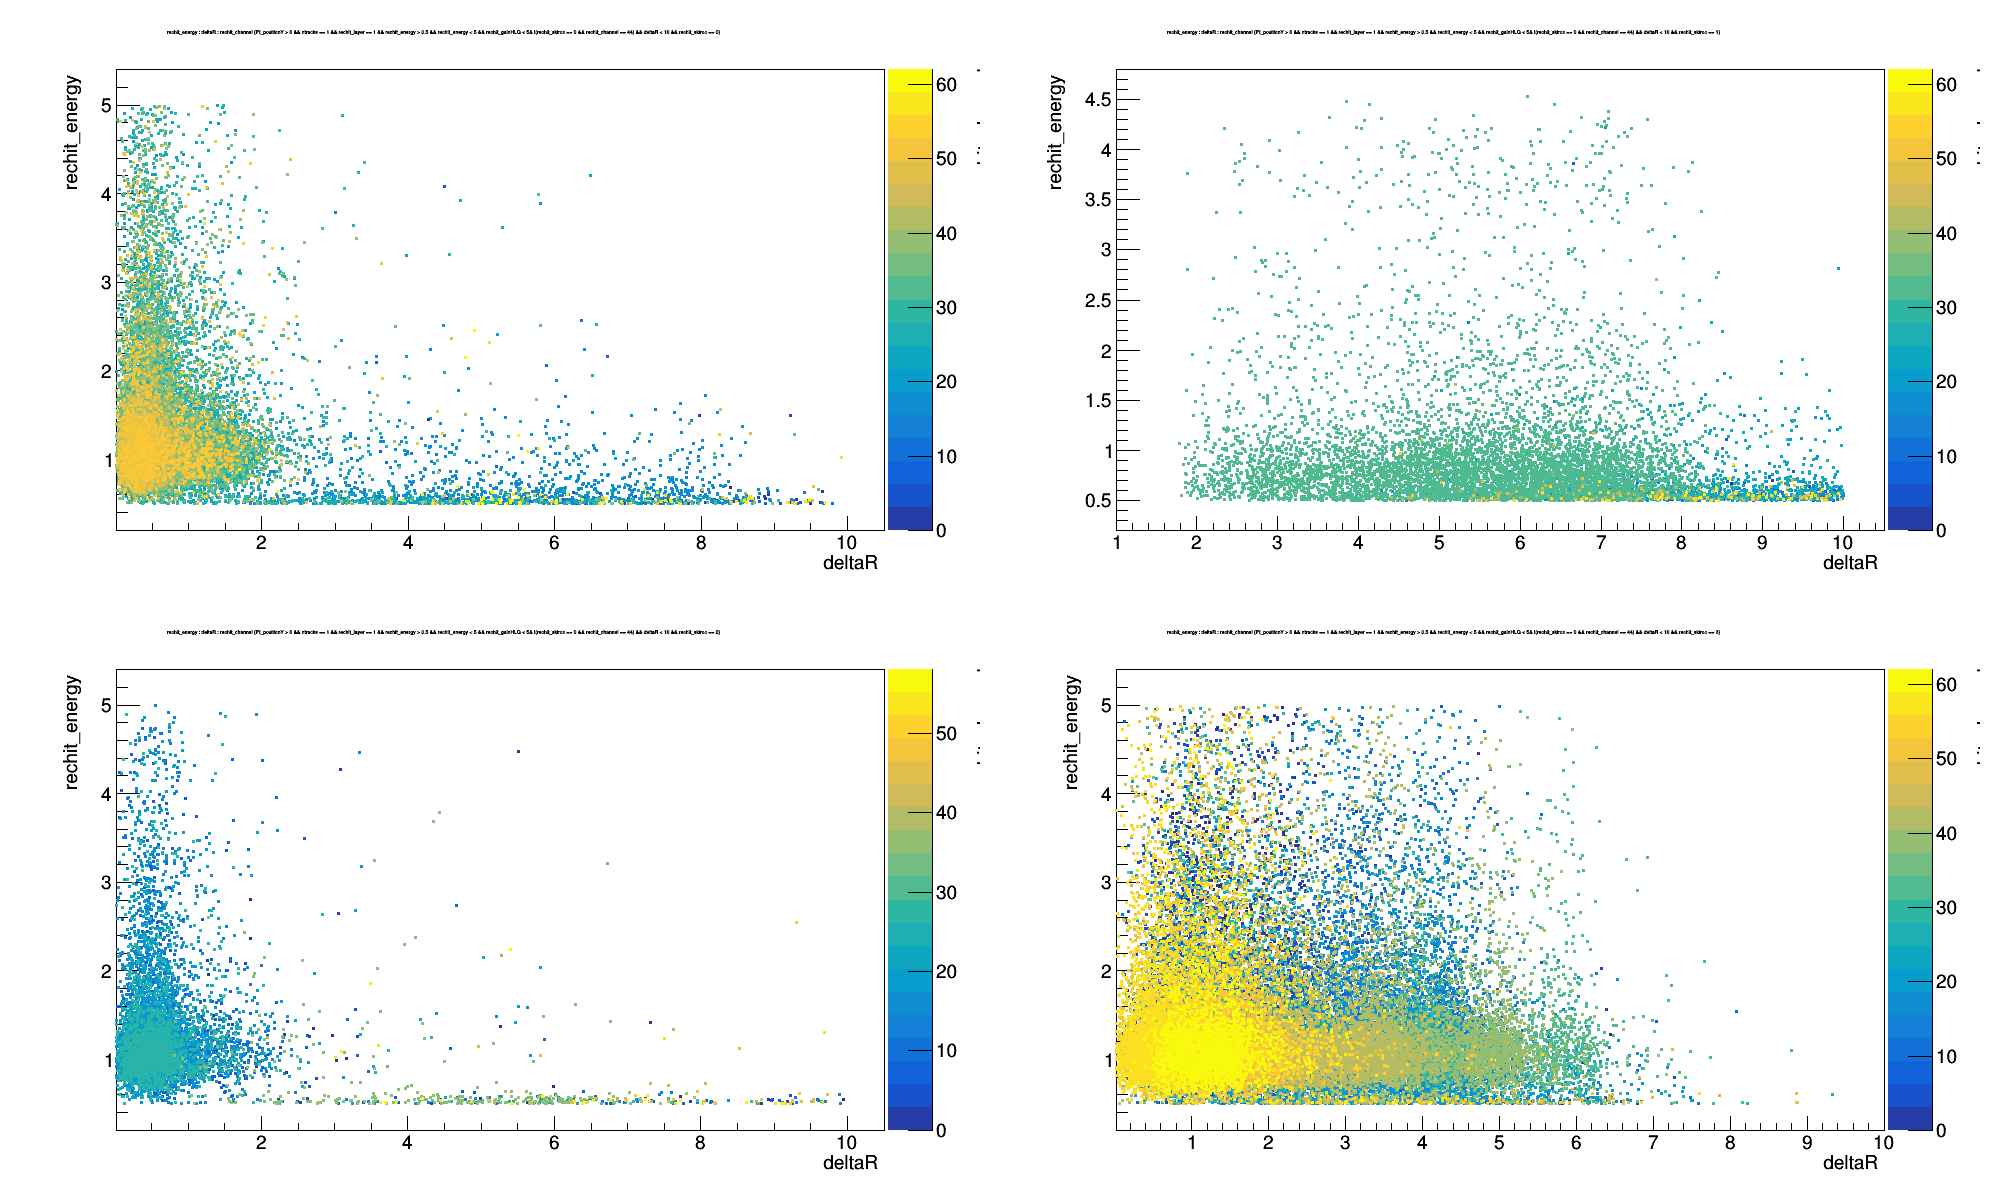

In [11]:
for chip in range(4):
    canv_split.cd(chip+1);
 
    cuts = cutstr + " && deltaR < 10 && rechit_skiroc == %i" %chip;
    print(chip)
    tree.Draw("rechit_energy : deltaR : rechit_channel",cuts,"pcolz");
    
canv_split.Draw()

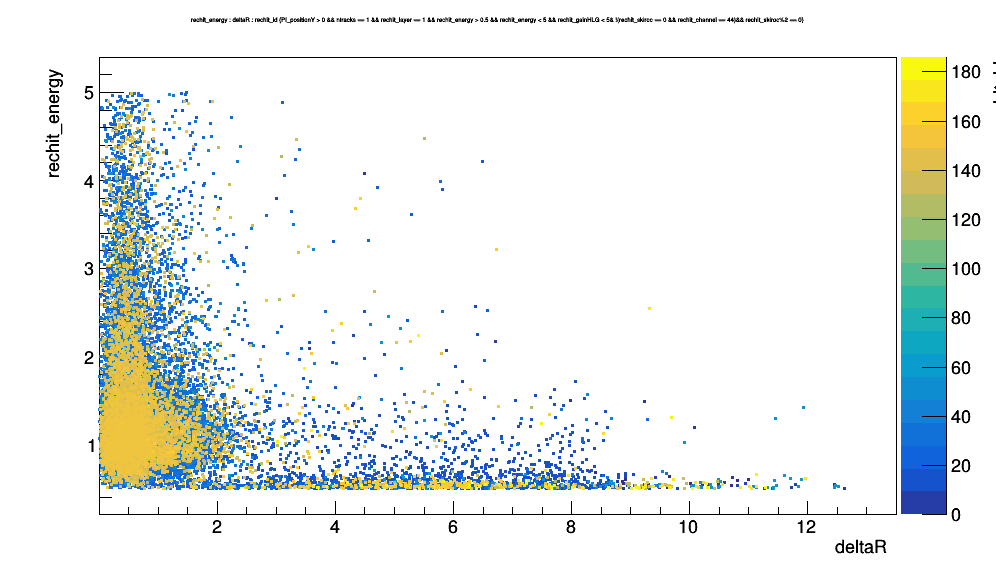

In [12]:
canv.cd()
cuts = cutstr + "&& rechit_skiroc%2 == 0"
tree.Draw("rechit_energy : deltaR : rechit_id",cuts,"pcolz");
canv.Draw()

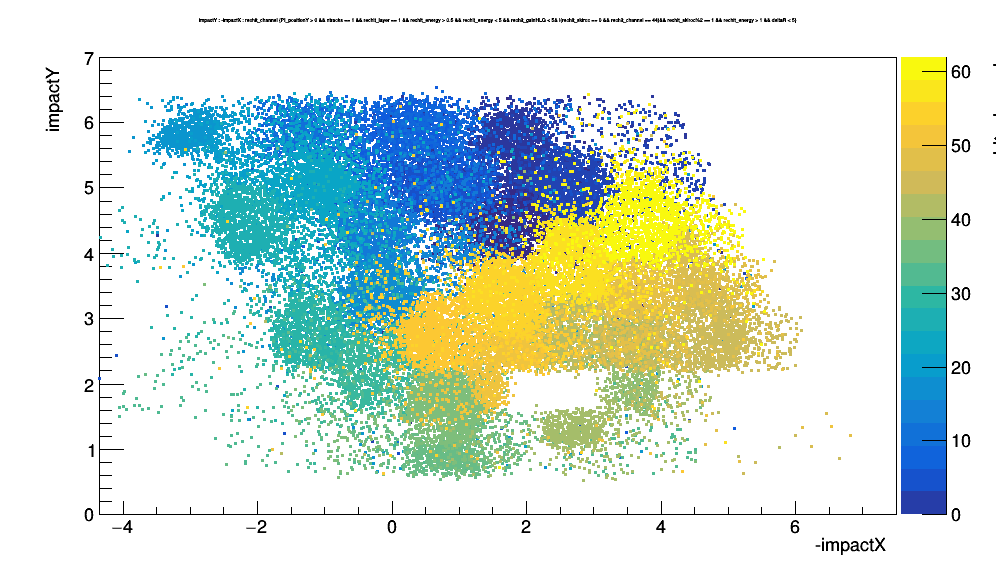

In [13]:
canv.cd()
cuts = cutstr + "&& rechit_skiroc%2 == 1 && rechit_energy > 1 && deltaR < 5"
tree.Draw("impactY : -impactX : rechit_channel",cuts,"pcolz");
canv.Draw()

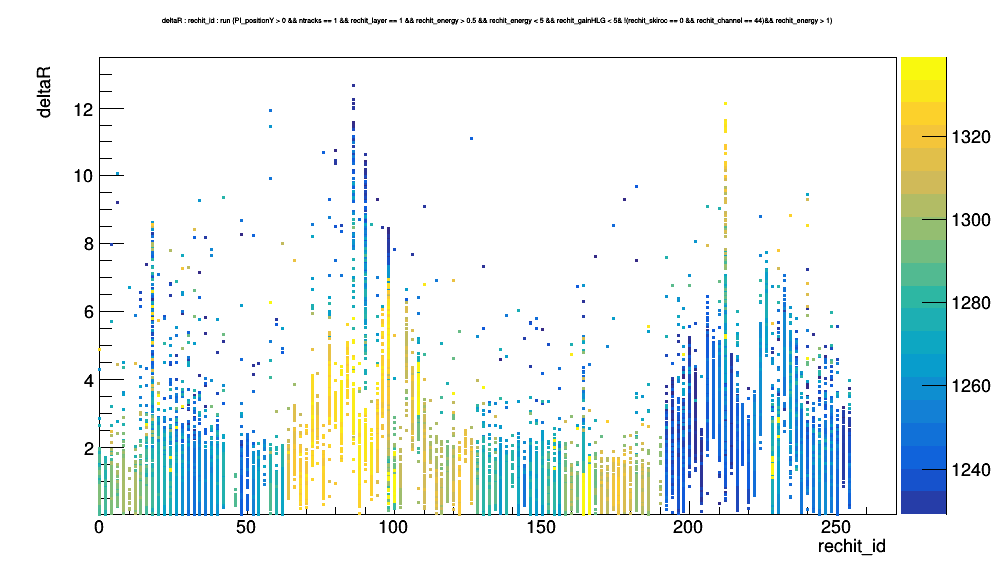

In [15]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaR : rechit_id : run",cuts,"pcolz");
canv.Draw()

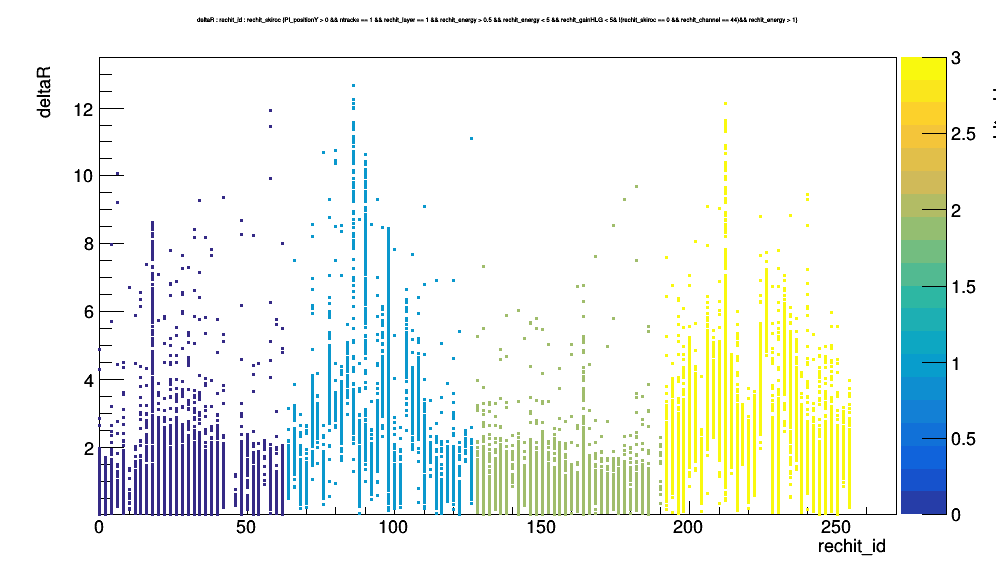

In [14]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaR : rechit_id : rechit_skiroc",cuts,"pcolz");
canv.Draw()

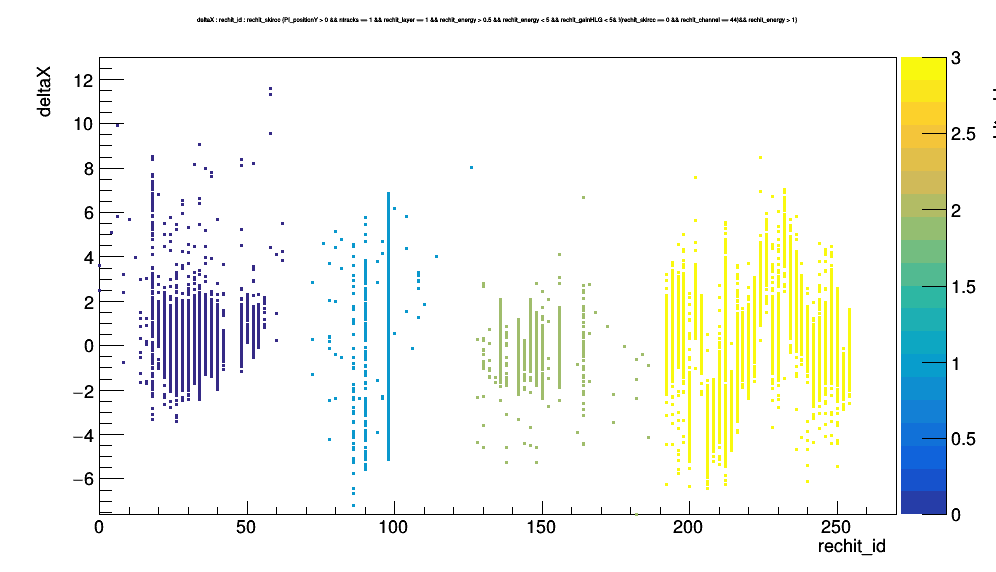

In [15]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaX : rechit_id : rechit_skiroc",cuts,"pcolz");
canv.Draw()

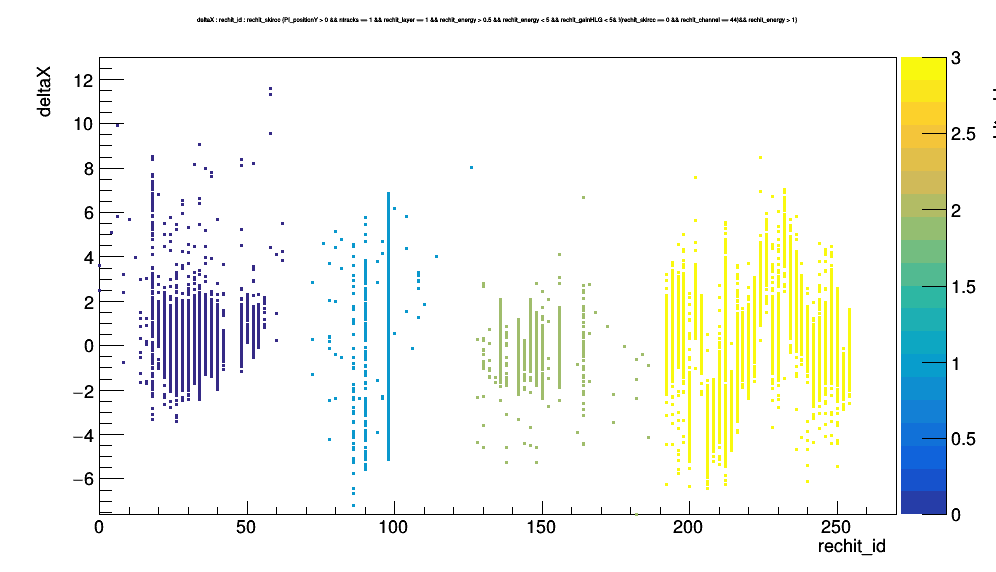

In [16]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaX : rechit_id : rechit_skiroc",cuts,"pcolz");
canv.Draw()

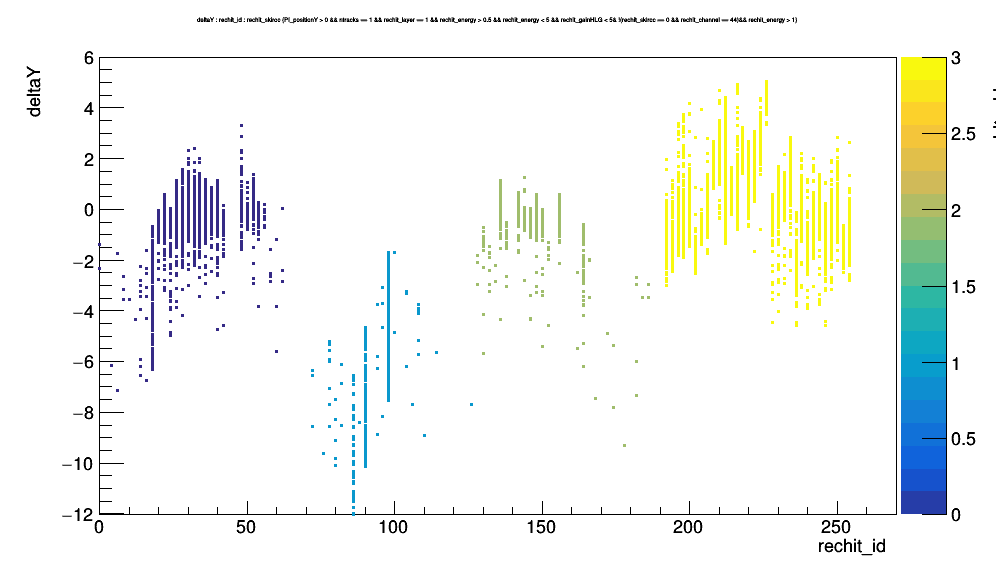

In [17]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1"
tree.Draw("deltaY : rechit_id : rechit_skiroc",cuts,"pcolz");
canv.Draw()

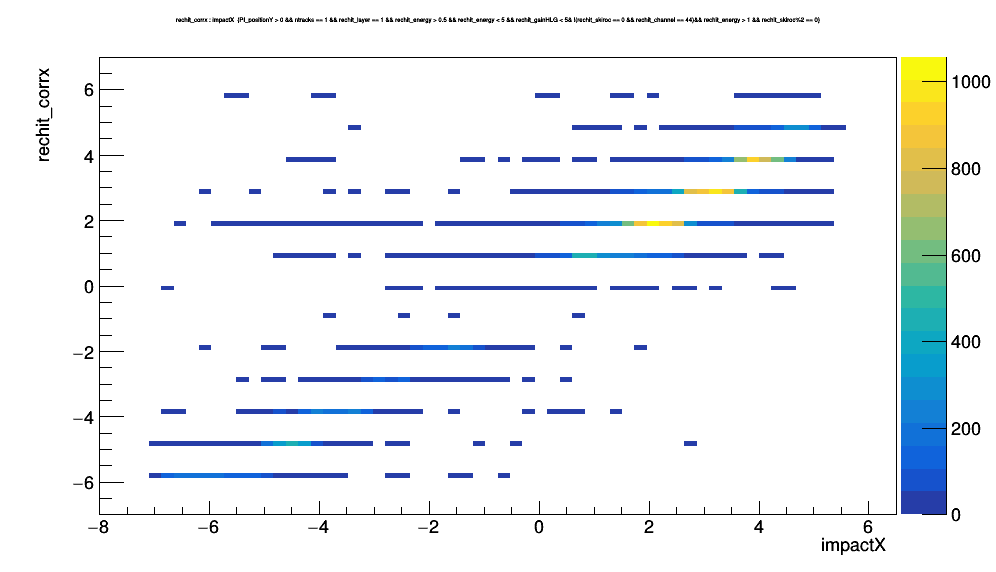

In [35]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1 && rechit_skiroc%2 == 0"
tree.Draw("rechit_corrx : impactX ",cuts,"colz");
canv.Draw()

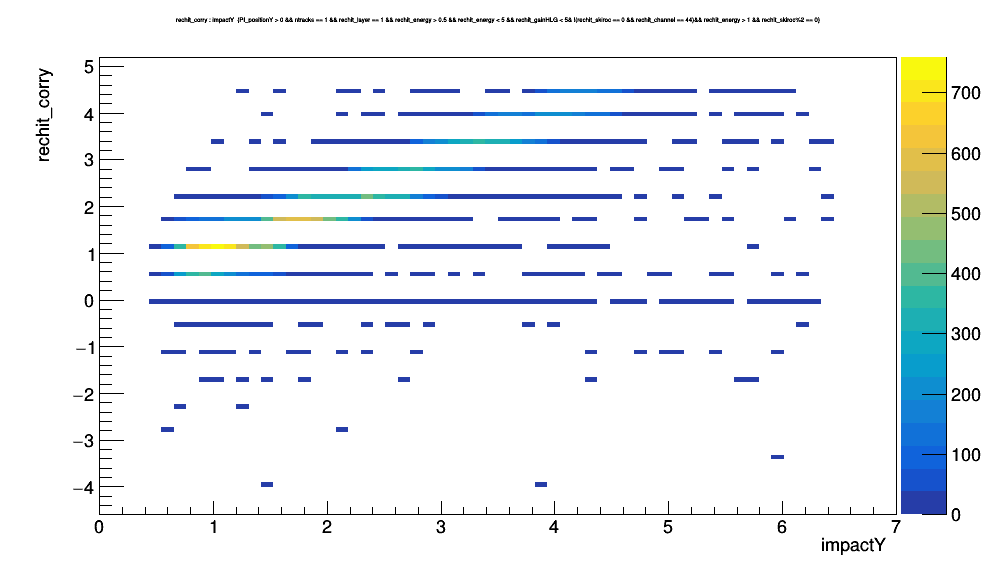

In [36]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1 && rechit_skiroc%2 == 0"
tree.Draw("rechit_corry : impactY ",cuts,"colz");
canv.Draw()

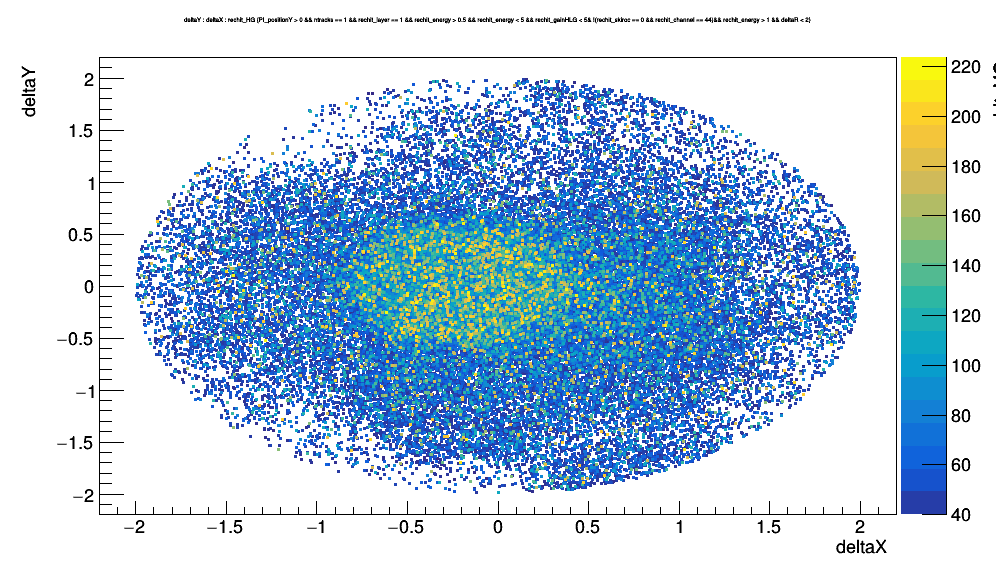

In [19]:
canv.cd()
cuts = cutstr + "&& rechit_energy > 1 && deltaR < 2"
tree.Draw("deltaY : deltaX : rechit_HG",cuts,"pcolz");
canv.Draw()

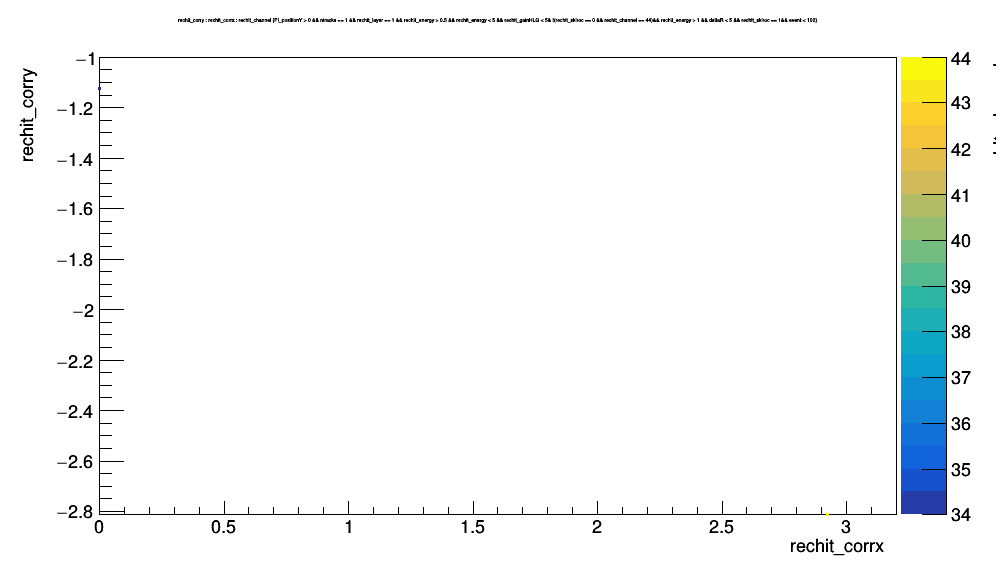

In [38]:
canv.cd()

chan = 10
chip = 1

cuts = cutstr + "&& rechit_energy > 1 && deltaR < 5 && rechit_skiroc == %i" %(chip)
cuts += "&& event < 100"

tree.Draw("rechit_corry : rechit_corrx : rechit_channel",cuts,"pcolz");
canv.Draw()

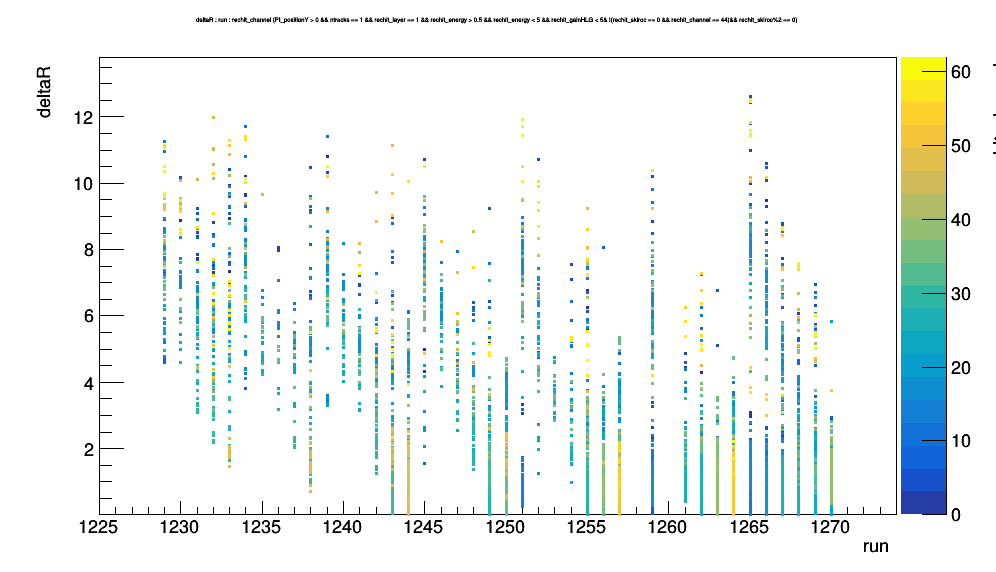

In [39]:
cuts = cutstr + "&& rechit_skiroc%2 == 0"
tree.Draw("deltaR : run : rechit_channel",cuts,"pcolz");
canv.Draw()

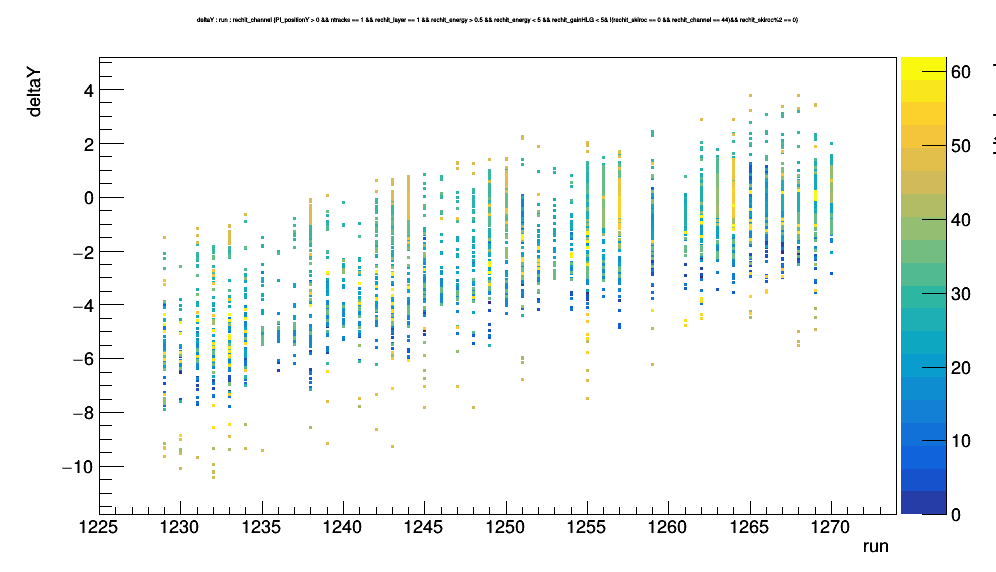

In [40]:
cuts = cutstr + "&& rechit_skiroc%2 == 0"
tree.Draw("deltaY : run : rechit_channel",cuts,"pcolz");
canv.Draw()

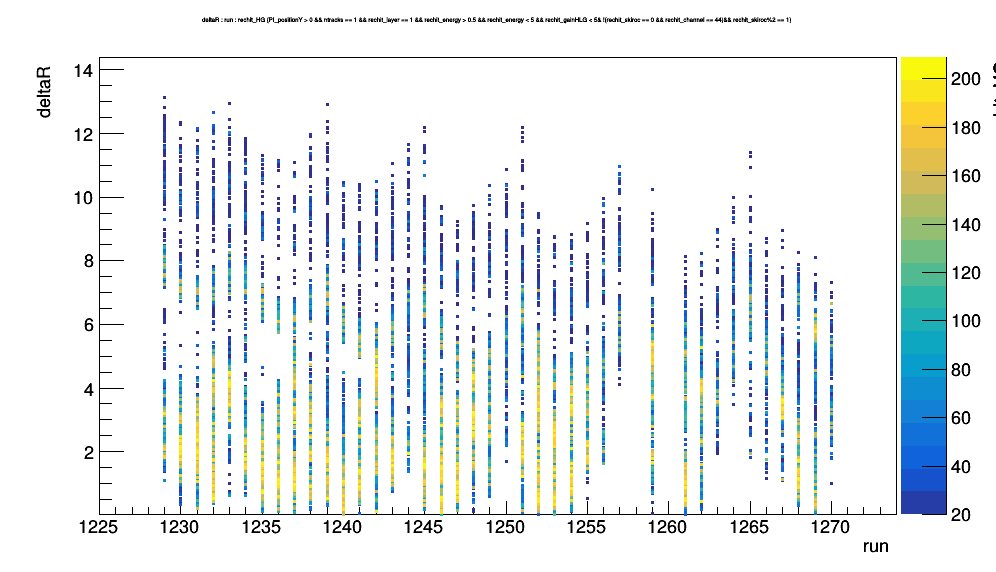

In [41]:
cuts = cutstr + "&& rechit_skiroc%2 == 1"
tree.Draw("deltaR : run : rechit_HG",cuts,"pcolz");
canv.Draw()

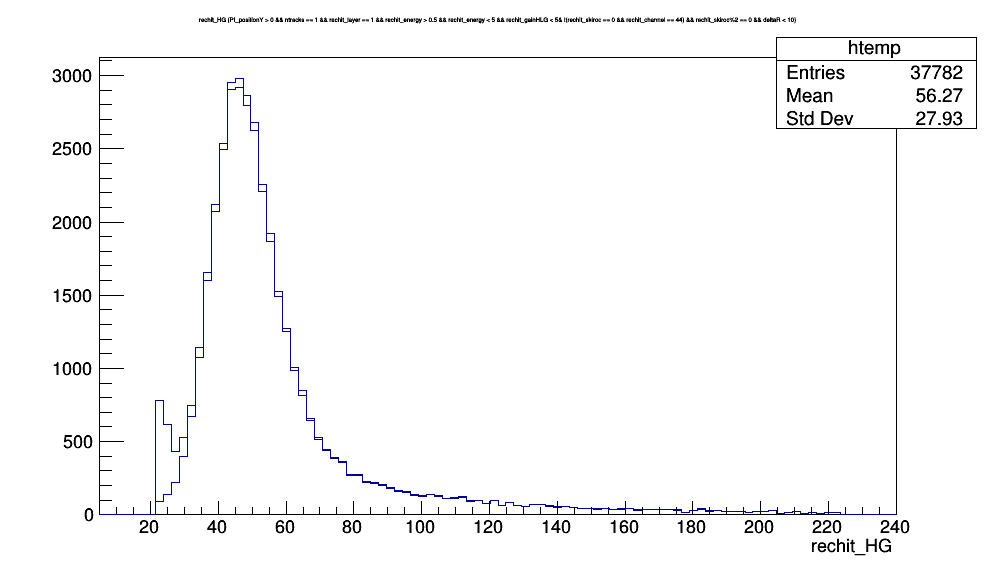

In [42]:
cuts = cutstr + " && rechit_skiroc%2 == 0 && deltaR < 10";
tree.Draw("rechit_HG",cuts,"");

cuts += " && deltaR < 2";
tree.Draw("rechit_HG",cuts,"same");

canv.Draw()

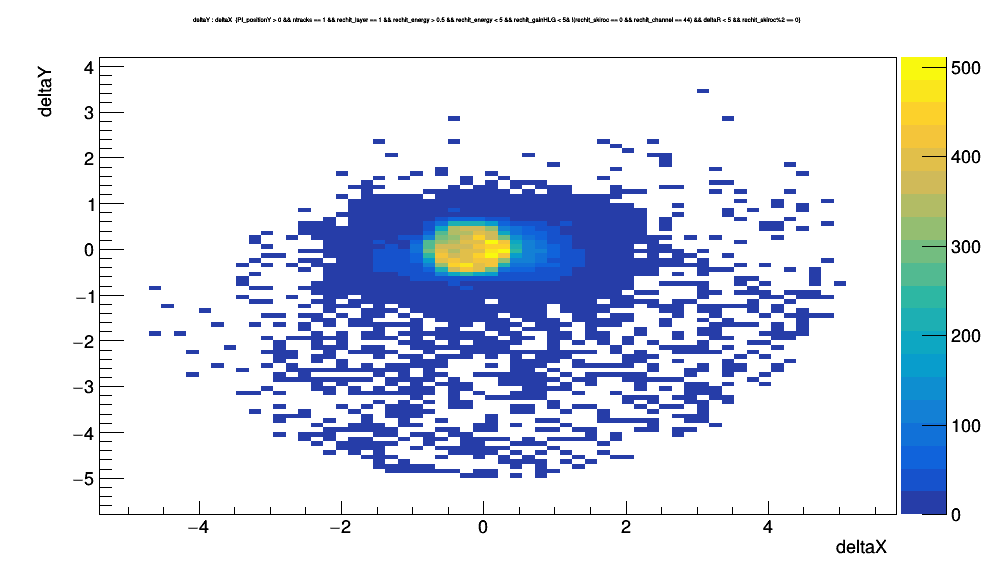

In [43]:
cuts = cutstr + " && deltaR < 5 && rechit_skiroc%2 == 0";
tree.Draw("deltaY : deltaX ",cuts,"colz");
canv.Draw()

 FCN=1012.67 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=1.13029e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.14666e+03   7.77439e+00   9.57251e-02   3.96273e-07
   2  Mean        -1.98213e-02   1.94450e-03   3.02271e-05  -3.31330e-03
   3  Sigma        3.61967e-01   1.49881e-03   1.64741e-05  -3.36969e-02


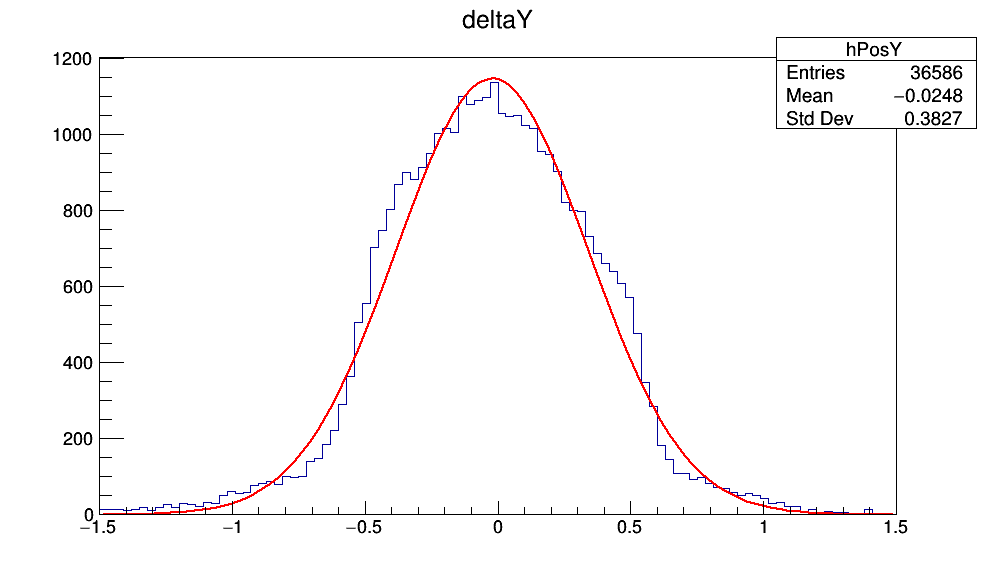

In [44]:
cuts = cutstr + " && deltaR < 5 && rechit_skiroc%2 == 0 ";

hPos = rt.TH1F("hPosY","deltaY", 100,-1.5,1.5);
tree.Draw("deltaY >> hPosY ",cuts,"");
hPos.Fit("gaus");

canv.Draw()

 FCN=2139.83 FROM MIGRAD    STATUS=CONVERGED      70 CALLS          71 TOTAL
                     EDM=3.2021e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.17387e+02   6.53304e+00   1.01933e-01   1.26297e-06
   2  Mean        -1.21520e-01   2.78410e-03   6.08041e-05   5.57660e-03
   3  Sigma        4.81754e-01   2.84752e-03   2.86266e-05  -4.09978e-02


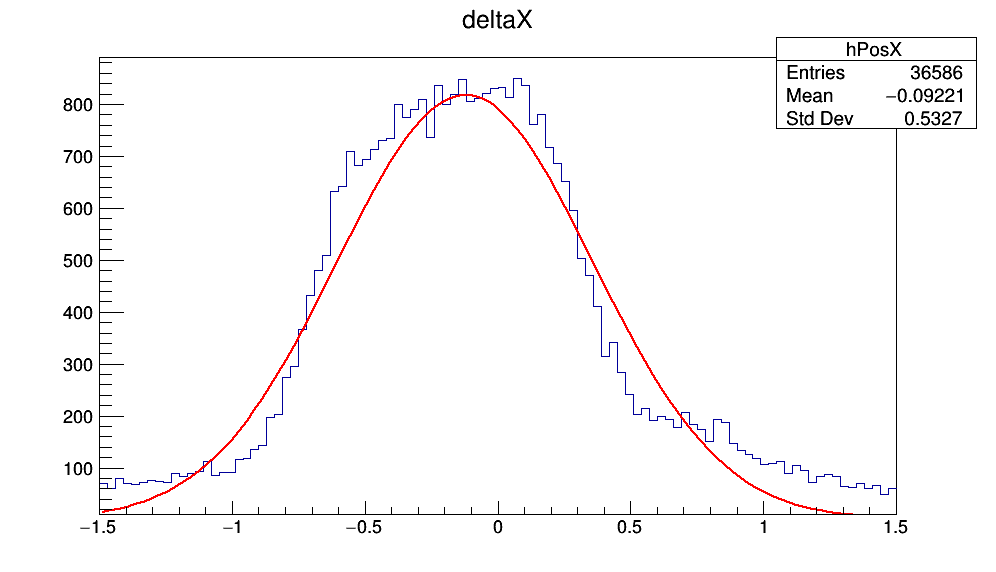

In [45]:
cuts = cutstr + " && deltaR < 5 && rechit_skiroc%2 == 0 ";

hPos = rt.TH1F("hPosX","deltaX", 100,-1.5,1.5);
tree.Draw("deltaX >> hPosX ",cuts,"");
hPos.Fit("gaus");

canv.Draw()

In [46]:
cuts = cutstr + " && deltaR < 2 && rechit_skiroc%2 == 0";
tree.Draw("deltaR",cuts,"");
canv.Draw()

Error in callback <bound method CaptureDrawnPrimitives._post_execute of <JupyROOT.utils.CaptureDrawnPrimitives object at 0x10fb0e750>> (for post_execute):


OSError: [Errno 24] Too many open files: '/var/folders/s7/nvg79vw9103fkm1pg725trc80000gn/T/tmpeSUMrF.png'

In [47]:
cuts = cutstr + " && deltaR < 2 && rechit_skiroc%2 == 0";
tree.Draw("deltaX:rechit_id:run",cuts,"pcolz");
canv.Draw()

Error in callback <bound method CaptureDrawnPrimitives._post_execute of <JupyROOT.utils.CaptureDrawnPrimitives object at 0x10fb0e750>> (for post_execute):
The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.

OSError: [Errno 24] Too many open files: '/var/folders/s7/nvg79vw9103fkm1pg725trc80000gn/T/tmp78mJIq.png'

In [48]:
cuts = cutstr + " && deltaR < 2 && rechit_skiroc%2 == 0";
tree.Draw("impactX : impactY : rechit_HG",cuts,"pcolz");
canv.Draw()

Exception in thread IPythonHistorySavingThread:
Traceback (most recent call last):
  File "/usr/local/Cellar/python@2/2.7.15/Frameworks/Python.framework/Versions/2.7/lib/python2.7/threading.py", line 801, in __bootstrap_inner
  File "<decorator-gen-24>", line 2, in run
  File "/usr/local/Cellar/ipython@5/5.7.0/libexec/lib/python2.7/site-packages/IPython/core/history.py", line 60, in needs_sqlite
  File "/usr/local/Cellar/ipython@5/5.7.0/libexec/lib/python2.7/site-packages/IPython/core/history.py", line 843, in run
  File "/usr/local/Cellar/ipython@5/5.7.0/libexec/vendor/lib/python2.7/site-packages/ipykernel/iostream.py", line 376, in write
  File "/usr/local/Cellar/ipython@5/5.7.0/libexec/vendor/lib/python2.7/site-packages/ipykernel/iostream.py", line 203, in schedule
  File "/usr/local/Cellar/ipython@5/5.7.0/libexec/vendor/lib/python2.7/site-packages/ipykernel/iostream.py", line 101, in _event_pipe
  File "/usr/local/Cellar/ipython@5/5.7.0/libexec/vendor/lib/python2.7/site-packages/zm

Error in callback <bound method CaptureDrawnPrimitives._post_execute of <JupyROOT.utils.CaptureDrawnPrimitives object at 0x10fb0e750>> (for post_execute):


OSError: [Errno 24] Too many open files: '/var/folders/s7/nvg79vw9103fkm1pg725trc80000gn/T/tmpGVMLHU.png'

## MIP / MPV

In [49]:
cuts = cutstr + " && deltaR < 2 && rechit_skiroc%2 == 0";
tree.Draw("rechit_HG : rechit_id : deltaR", cuts,"pcolz");
canv.Draw()

Error in callback <bound method CaptureDrawnPrimitives._post_execute of <JupyROOT.utils.CaptureDrawnPrimitives object at 0x10fb0e750>> (for post_execute):


OSError: [Errno 24] Too many open files: '/var/folders/s7/nvg79vw9103fkm1pg725trc80000gn/T/tmpiD7P09.png'

In [50]:
cuts = cutstr + " && deltaR < 2 && rechit_skiroc == 0";
tree.Draw("rechit_HG : rechit_channel >> (64,0,63,100,20,100)", cuts,"colz");
canv.Draw()

Error in callback <bound method CaptureDrawnPrimitives._post_execute of <JupyROOT.utils.CaptureDrawnPrimitives object at 0x10fb0e750>> (for post_execute):


OSError: [Errno 24] Too many open files: '/var/folders/s7/nvg79vw9103fkm1pg725trc80000gn/T/tmpblxWXo.png'

In [51]:
cuts = cutstr + " && deltaR < 2 && rechit_skiroc == 0";
tree.Draw("rechit_energy : rechit_channel >> (64,0,63,100,0.5,2)", cuts,"colz");
canv.Draw()

Error in callback <bound method CaptureDrawnPrimitives._post_execute of <JupyROOT.utils.CaptureDrawnPrimitives object at 0x10fb0e750>> (for post_execute):


OSError: [Errno 24] Too many open files: '/var/folders/s7/nvg79vw9103fkm1pg725trc80000gn/T/tmpz6ii2F.png'